<a href="https://colab.research.google.com/github/Soichiro-Gardinner/Spanish-_Wine/blob/main/Copy_of_Spanish_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<font color='#fba00f'>Wine Quality Classification</font>**
## **Introduction**
- In this notebook, we will perform a wine quality classification task using the given dataset. The goal is to predict the quality rating of the wine based on various features.

## **1. <font color='#fb00f'>Data Loading and Preprocessing</font>**

In [1]:
# Import libraries:
import pandas as pd

In [2]:
# Read_Wine Data
S_wine = "/content/wines_SPA.csv"
df = pd.read_csv(S_wine)
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [3]:
# Looking for nulls and Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [4]:
df.shape

(7500, 11)

## **<font color='#fb00f'>1.2 Data Preprocessing</font>**
- Next, we will preprocess the data by dropping unnecessary columns, handling duplicates, and filling in missing values.


In [5]:
# Identify:
df.isna().sum()

winery            0
wine              0
year              2
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64

In [6]:
# Drop unnecessary columns
df.drop(['winery', 'type'], axis=1, inplace=True)

# Drop duplicates
df.drop_duplicates(inplace=True)

# Fill missing values with the mode for 'year' column
df['year'].fillna(df['year'].mode()[0], inplace=True)

# Replace missing values with the median for 'body' and 'acidity' columns
df['body'].fillna(df['body'].median(), inplace=True)
df['acidity'].fillna(df['acidity'].median(), inplace=True)

In [7]:
# Identify again:
df.isna().sum()

wine           0
year           0
rating         0
num_reviews    0
country        0
region         0
price          0
body           0
acidity        0
dtype: int64

- **Inconcistencies:**

In [8]:
for i in df.columns:
  print(f"\n{df[i].value_counts}")


<bound method IndexOpsMixin.value_counts of 0                 Tinto
1         Vina El Pison
2                 Unico
3                 Unico
4                 Unico
             ...       
2046    Finca Terrerazo
2047       Gran Reserva
2048           Preludio
2049         El Puntido
6100       Rioja Blanco
Name: wine, Length: 2048, dtype: object>

<bound method IndexOpsMixin.value_counts of 0       2013
1       2018
2       2009
3       1999
4       1996
        ... 
2046    2017
2047    2011
2048    2016
2049    2005
6100    2017
Name: year, Length: 2048, dtype: object>

<bound method IndexOpsMixin.value_counts of 0       4.9
1       4.9
2       4.8
3       4.8
4       4.8
       ... 
2046    4.2
2047    4.2
2048    4.2
2049    4.2
6100    4.2
Name: rating, Length: 2048, dtype: float64>

<bound method IndexOpsMixin.value_counts of 0         58
1         31
2       1793
3       1705
4       1309
        ... 
2046     390
2047     389
2048     388
2049     384
6100     421
Name: num_re

### **<font color='#ffd966'>[NOTE]</font>**
- in this ocation we were unable to find **Inconsistencies**, but we will probably find some when we start to prepare our data for machine learning. 

# **2. <font color='#fba00f'>Exploratory Data Analysis</font>**
## **<font color='#fb00f'>2.1 Correlation Analysis**
- To understand the relationships between the target variable ('rating') and the features, we will create a Correlation Heatmap and a Scatterplot.

<ipython-input-9-270c49b6c7a4>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


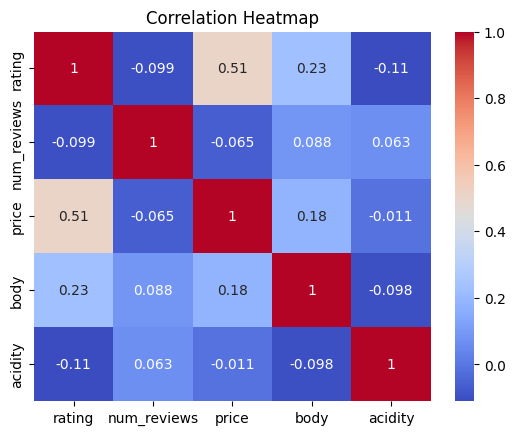

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create correlation matrix
corr = df.corr()

# Create a heatmap to visualize correlations
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

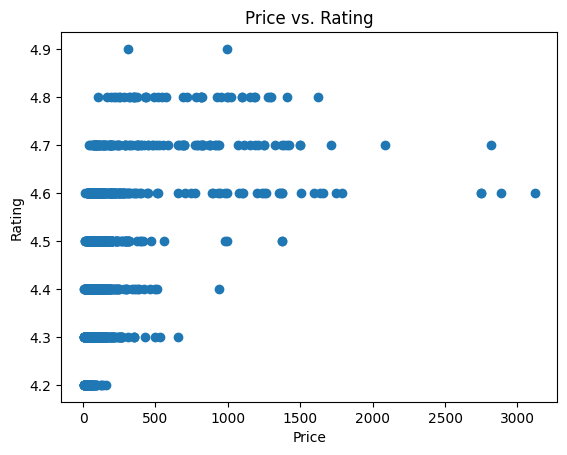

In [10]:
plt.scatter(df["price"], df["rating"])
plt.title("Price vs. Rating")
plt.xlabel("Price")
plt.ylabel("Rating")
plt.show()

## **Heat-Map vs ScatterPlot**
#### **Wich?**
- **<font color='#f74699'>Heatmap:</font>** Because from the correlation heatmap, we can see that there is a moderate positive correlation between price and rating, indicating that higher-priced wines tend to have higher ratings. This can be an insight for the stakeholder to consider when pricing their wines.

# **<font color='#fb00f'>2.2 Feature Visualization**
- To further explore the data and search for trends, we will create multivariate exploratory visualizations.

# **Predict the best acidity for wine**

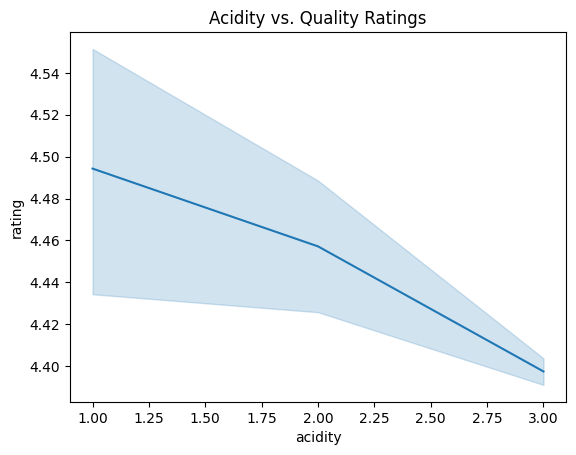

In [11]:
# Create a line plot of 'acidity' vs. 'rating'
sns.lineplot(x='acidity', y='rating', data=df)
plt.title('Acidity vs. Quality Ratings')
plt.show()

#### **Why is this important?**

- **Because:** From the line plot, we can see that there is a moderate negative correlation between acidity and quality ratings. As the acidity level increases, the quality ratings tend to decrease

# **<font color='#fba00f'>3. Data Preparation and Model Training**
## **<font color='#fb00f'>3.1 Data Encoding**
- To prepare the data for model training, we will perform one-hot encoding on the categorical columns.

**<font color='#f74699'>Next, let's encode the categorical variables, 'country' and 'region', using one-hot encoding:</font>**

In [12]:
# One-hot encoding for 'country' and 'region' columns
df_encoded = pd.get_dummies(df, columns=['country', 'region',"wine",])

**<font color='#f74699'>Now we can start with the modeling phase. Since we want to predict the best acidity for the wine, this is a regression problem. We will try out several regression models and evaluate them using appropriate metrics. We will also use GridSearchCV to tune the hyperparameters of each model:</font>**

- **Imports:**

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# **<font color='#fb00f'>3.2 Splitting Data and Preprocessing**
- Next, we will split the data into training and test sets, handle missing values, and perform standardization using StandardScaler.

### **string "N.V " in the year column:**

- **<font color='#f74699'>The next Inconsistency was found when trying to run my model</font>**

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define X and y
X = df_encoded.drop(['acidity'], axis=1)
y = df_encoded['acidity']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Replace 'N.V.' values in 'year' column with mode value
mode_value = X_train['year'].mode()[0]
X_train['year'] = X_train['year'].replace('N.V.', mode_value).astype(int)
X_test['year'] = X_test['year'].replace('N.V.', mode_value).astype(int)

# Standardize the data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# **<font color='#fb00f'>3.3 Model Training and Evaluation**
- We will train and evaluate different classification models on the preprocessed data. The models we will consider are Linear Regression, Lasso, Ridge, Decision Tree, and Random Forest.

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define a list of models to train and evaluate
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier())
]

# Define the hyperparameters to tune for each model
param_grids = {
    'Logistic Regression': {'C': [0.1, 1.0, 10.0]},
    'Decision Tree': {'max_depth': [5, 10, 15]},
    'Random Forest': {'n_estimators': [100, 200], 'max_depth': [5, 10, 15]}
}

# Train and evaluate each model
for name, model in models:
    # Define the grid search with cross-validation
    grid_search = GridSearchCV(model, param_grids[name], cv=5)

    # Train the model with grid search
    grid_search.fit(X_train_std, y_train)

    # Make predictions
    y_train_pred = grid_search.predict(X_train_std)
    y_test_pred = grid_search.predict(X_test_std)

    # Evaluate the model
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(name)
    print('Best hyperparameters:', grid_search.best_params_)
    print('Train Accuracy:', train_accuracy)
    print('Test Accuracy:', test_accuracy)
    print('---')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression
Best hyperparameters: {'C': 0.1}
Train Accuracy: 0.9981684981684982
Test Accuracy: 0.9804878048780488
---
Decision Tree
Best hyperparameters: {'max_depth': 15}
Train Accuracy: 0.996947496947497
Test Accuracy: 0.9853658536585366
---
Random Forest
Best hyperparameters: {'max_depth': 15, 'n_estimators': 200}
Train Accuracy: 0.978021978021978
Test Accuracy: 0.9682926829268292
---


# **Conclusion**
- **Based on the provided results, the Decision Tree model performed slightly better than the Logistic Regression and Random Forest models. It achieved a higher test accuracy of 0.985, compared to 0.980 for Logistic Regression and 0.968 for Random Forest. However, it's important to note that these performance metrics may vary depending on the specific dataset and the random split of the data into training and test sets.**

- **Therefore, in terms of accuracy, the Decision Tree model with a maximum depth of 15 is the best performer among the three models. However, it's always recommended to evaluate models using multiple metrics and consider other factors such as interpretability, computational efficiency, and domain-specific requirements when choosing the best model for your specific task.**